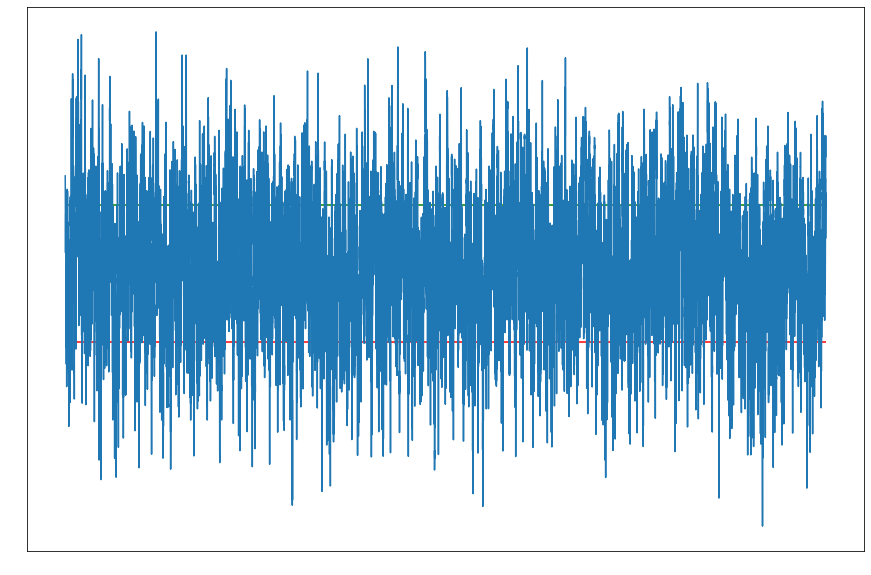

In [204]:
import numpy as np
import talib
import matplotlib.pyplot as plt

# load and plot 5 minute candle data from May 2021

raw_data = np.genfromtxt('ETHGBP-5m-2021.csv', delimiter=',')
closing_prices = raw_data[:, 4]
rsi = talib.RSI(closing_prices, timeperiod=21)

fig, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.hlines(y = 60, xmin = 0, xmax = rsi.size, color="g")
plt.hlines(y = 40, xmin = 0, xmax = rsi.size, color="r")
plt.plot(rsi)
plt.show()


In [215]:
# Binance takes a 0.1% fee on each transaction (buy or sell).
# Fee stucture documented on: https://www.binance.com/en/fee/trading
FEE_MULTIPLIER = 0.999

# Given the fee structure, for a buy/sell pair to be profitable, the buy price divided by
# sell price needs to be greater that 1001/999 = 1.002002
PROFIT_RATIO = 1.003

# For below simulation, will be using close price of each 5 minute candle. This comes with limitations:
# 1. does not account for buying at any intermediary value
# 2. does not account for potentially not executing limit order at that price
# 3. you could use minute data for potentially better decisions
# Another assumption is reinvesting of the whole sum you make a profit or loss from
def run_simulation(starting_sum, rsi, close_prices, overbought_signal, oversold_signal):
    current_sum = starting_sum
    crypto_held = 0
    buy_price = 0
    
    for idx, x in np.ndenumerate(rsi):
        if not np.isnan(x) and close_prices[idx] != 0:
            if x < oversold_signal and current_sum != 0:
                buy_price = close_prices[idx]
                crypto_held = buy(current_sum, close_prices[idx])
                current_sum = 0
            if x > overbought_signal and crypto_held != 0 and make_profit(buy_price, close_prices[idx]):
                current_sum = sell(crypto_held, close_prices[idx])
                crypto_held = 0
#                 print(f'fiat amount at after transactions: {current_sum}')

    if (current_sum == 0):
        print(f'Holding bags!!!!\nCrypto amount at end of month: {crypto_held} valued at {crypto_held * buy_price}')
    else:
        print(f'fiat amount at end of month: {current_sum}')

def buy(fiat_amount, crypto_price):
    effective_amount = fiat_amount * FEE_MULTIPLIER
    return effective_amount / crypto_price

def sell(crypto_amount, crypto_price):
    effective_amount = crypto_amount * FEE_MULTIPLIER
    return effective_amount * crypto_price

def make_profit(buy_price, current_price):
    return current_price / buy_price > PROFIT_RATIO

def hold_profit(start_amount, closing_prices):
    print(f'Hold strategy result if buying at {closing_prices[0]} and holding until {closing_prices[-1]} is {start_amount * closing_prices[-1] / closing_prices[0]}')

In [216]:
run_simulation(100, rsi, closing_prices, 60, 40)
hold_profit(100, closing_prices)

Holding bags!!!!
Crypto amount at end of month: 0.12687320604674682 valued at 363.8761611382513
Hold strategy result if buying at 540.63 and holding until 1905.07 is 352.3796311710412
